In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
nycp = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/%20NYC%20Payroll%20Data/k397-673e.csv")
nycp.head()

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_july_31,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2020,67,ADMIN FOR CHILDREN'S SVCS,ROSSELLI,DENISE,NaN,2016-08-29T00:00:00.000,MANHATTAN,PRINCIPAL ADMINISTRATIVE ASSOCIATE - NON SUPVR,CEASED,55839.0,per Annum,0.00,639.81,0.00,5.62,0.00
1,2020,67,ADMIN FOR CHILDREN'S SVCS,EPPS,ROY,L,2019-06-24T00:00:00.000,BRONX,YOUTH DEVELOPMENT SPECIALIST,CEASED,45759.0,per Annum,876.25,20394.66,18.00,581.34,650.19
2,2020,67,ADMIN FOR CHILDREN'S SVCS,MALACHI,DIAMOND,NaN,2019-03-25T00:00:00.000,BROOKLYN,YOUTH DEVELOPMENT SPECIALIST,ACTIVE,45759.0,per Annum,1820.00,46665.35,443.25,15179.21,210.04
3,2020,67,ADMIN FOR CHILDREN'S SVCS,SALVADOR JR,EFREN,V,2016-06-20T00:00:00.000,MANHATTAN,PRINCIPAL ADMINISTRATIVE ASSOCIATE - NON SUPVR,CEASED,51778.0,per Annum,0.00,626.26,0.00,4.92,0.00
4,2020,67,ADMIN FOR CHILDREN'S SVCS,BELLO,MELLY,D,2006-12-11T00:00:00.000,BROOKLYN,CHILD PROTECTIVE SPECIALIST SUPERVISOR,ACTIVE,67392.0,per Annum,1820.00,63663.60,121.50,5240.36,4202.53


In [3]:
nycp.nunique()

fiscal_year                     1
payroll_number                  1
agency_name                     1
last_name                     831
first_name                    734
mid_init                       25
agency_start_date             365
work_location_borough           5
title_description              67
leave_status_as_of_july_31      4
base_salary                   421
pay_basis                       3
regular_hours                 129
regular_gross_paid            720
ot_hours                      513
total_ot_paid                 651
total_other_pay               779
dtype: int64

In [4]:
nycp.isna().sum()

fiscal_year                     0
payroll_number                  0
agency_name                     0
last_name                       0
first_name                      0
mid_init                      328
agency_start_date               0
work_location_borough           0
title_description               0
leave_status_as_of_july_31      0
base_salary                     0
pay_basis                       0
regular_hours                   0
regular_gross_paid              0
ot_hours                        0
total_ot_paid                   0
total_other_pay                 0
dtype: int64

In [5]:
nycp = nycp.drop(columns=['fiscal_year', 'payroll_number', 'agency_name', 'last_name',
                         'first_name', 'mid_init', 'agency_start_date'])
nycp.columns = ['Borough', 'Job', 'Leave Status', 'Salary', 'Pay Basis', 'Reg Hours',
                'Reg Gross Pay', 'OT Hours', 'OT Pay', 'Other Pay']
nycp.head()

,Borough,Job,Leave Status,Salary,Pay Basis,Reg Hours,Reg Gross Pay,OT Hours,OT Pay,Other Pay
0,MANHATTAN,PRINCIPAL ADMINISTRATIVE ASSOCIATE - NON SUPVR,CEASED,55839.0,per Annum,0.00,639.81,0.00,5.62,0.00
1,BRONX,YOUTH DEVELOPMENT SPECIALIST,CEASED,45759.0,per Annum,876.25,20394.66,18.00,581.34,650.19
2,BROOKLYN,YOUTH DEVELOPMENT SPECIALIST,ACTIVE,45759.0,per Annum,1820.00,46665.35,443.25,15179.21,210.04
3,MANHATTAN,PRINCIPAL ADMINISTRATIVE ASSOCIATE - NON SUPVR,CEASED,51778.0,per Annum,0.00,626.26,0.00,4.92,0.00
4,BROOKLYN,CHILD PROTECTIVE SPECIALIST SUPERVISOR,ACTIVE,67392.0,per Annum,1820.00,63663.60,121.50,5240.36,4202.53


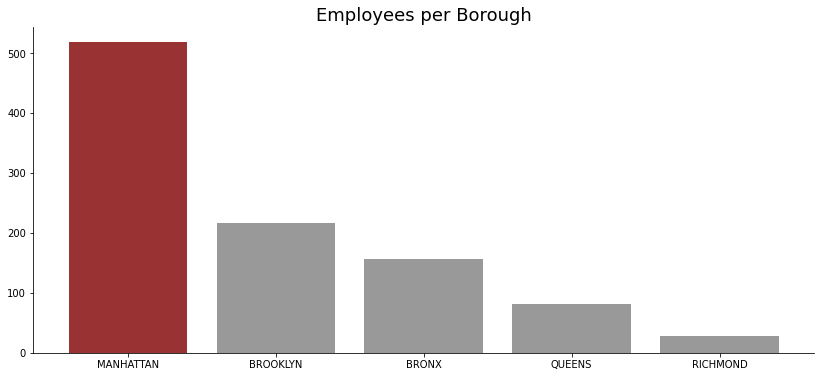

In [6]:
nycpb = nycp.Borough.value_counts()

fig, ax = plt.subplots(figsize = [14,6])

ax.bar(nycpb.keys(), nycpb.values, color=['maroon','gray','gray','gray','gray'], alpha=.8)
ax.set_title('Employees per Borough', fontsize = 18)
ax.spines[['right', 'top']].set_visible(False)

plt.show()

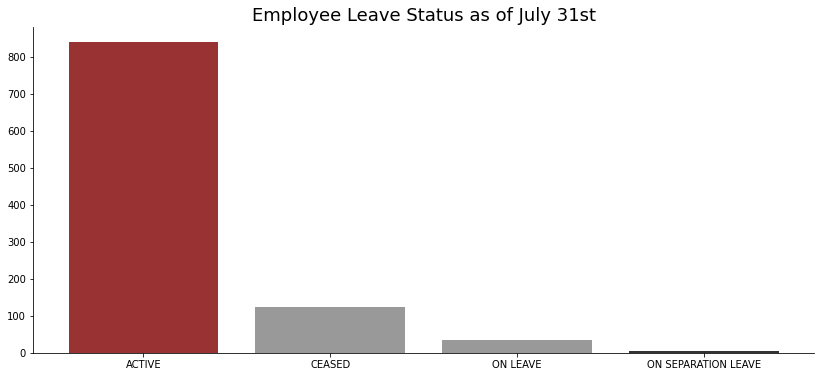

In [7]:
nycpl = nycp['Leave Status'].value_counts()

fig, ax = plt.subplots(figsize = [14,6])

ax.bar(nycpl.keys(), nycpl.values, color=['maroon','gray','gray','black'], alpha=.8)
ax.set_title('Employee Leave Status as of July 31st', fontsize = 18)
ax.spines[['right', 'top']].set_visible(False)

plt.show()

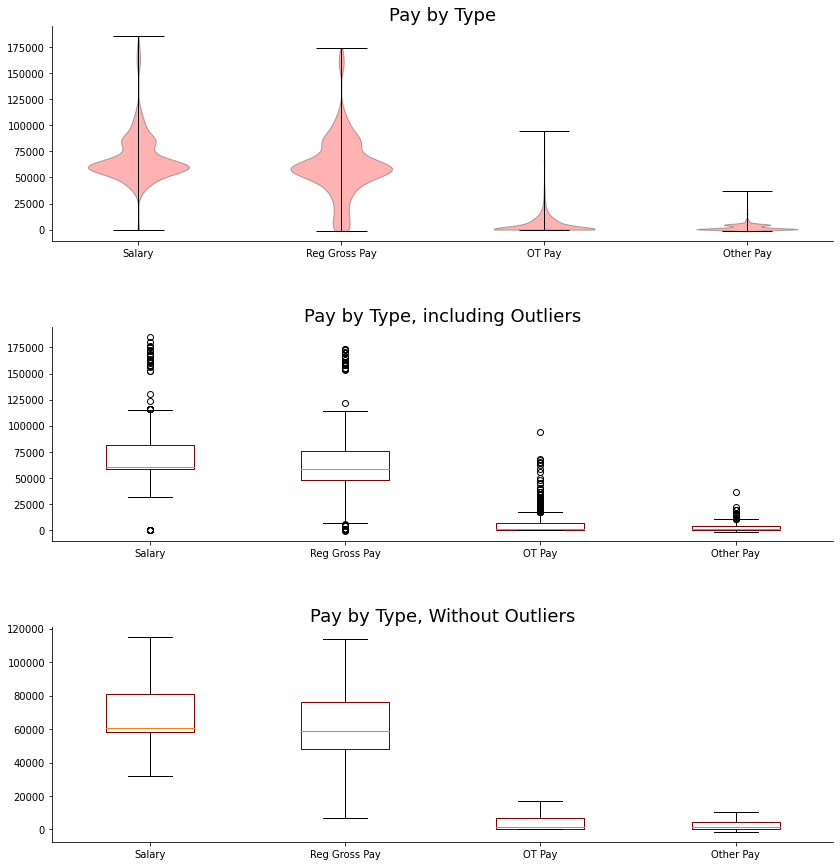

In [8]:
paydf = nycp[['Salary', 'Reg Gross Pay', 'OT Pay', 'Other Pay']]
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(14,15))

# Violin
violin_parts = axs[0].violinplot(paydf)
axs[0].set_title('Pay by Type',fontsize=18)

for partname in ('cbars','cmins','cmaxes'):
    vp = violin_parts[partname]
    vp.set_edgecolor('black')
    vp.set_linewidth(1)
    
for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')

# Box
box_parts = axs[1].boxplot(paydf)
axs[1].set_title('Pay by Type, including Outliers', fontsize=18)
for box in box_parts['boxes']:
    box.set(color='maroon', linewidth=1)

# Box w/o outliers
box_parts = axs[2].boxplot(paydf, showfliers = False)
axs[2].set_title('Pay by Type, Without Outliers', fontsize=18)

for box in box_parts['boxes']:
    box.set(color='maroon', linewidth=1)
    
for ax in axs:
    ax.yaxis.grid(False)
    ax.spines[['right', 'top']].set_visible(False)
    
plt.setp(axs, xticks=[y + 1 for y in range(len(paydf.columns))],
         xticklabels=paydf.columns)
plt.subplots_adjust(hspace=.4)

plt.show()

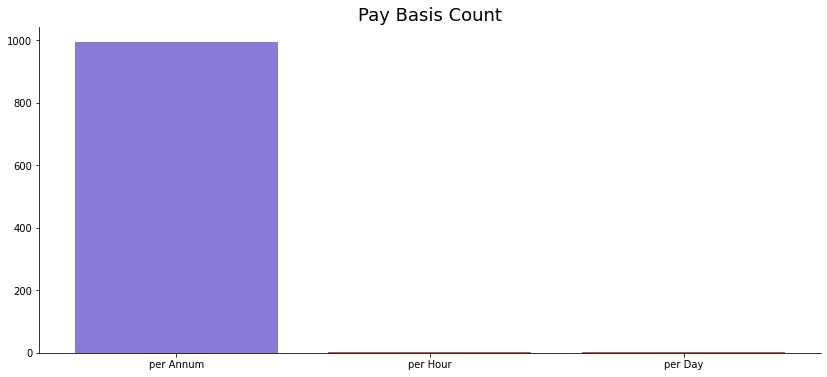

per Annum    993
per Hour       4
per Day        3
Name: Pay Basis, dtype: int64

In [9]:
nypb = nycp['Pay Basis'].value_counts()

fig, ax = plt.subplots(figsize = [14,6])

ax.bar(nypb.keys(), nypb.values, color=['slateblue','firebrick','firebrick'], alpha=.8)
ax.set_title('Pay Basis Count', fontsize = 18)
ax.spines[['right', 'top']].set_visible(False)

plt.show()

nypb

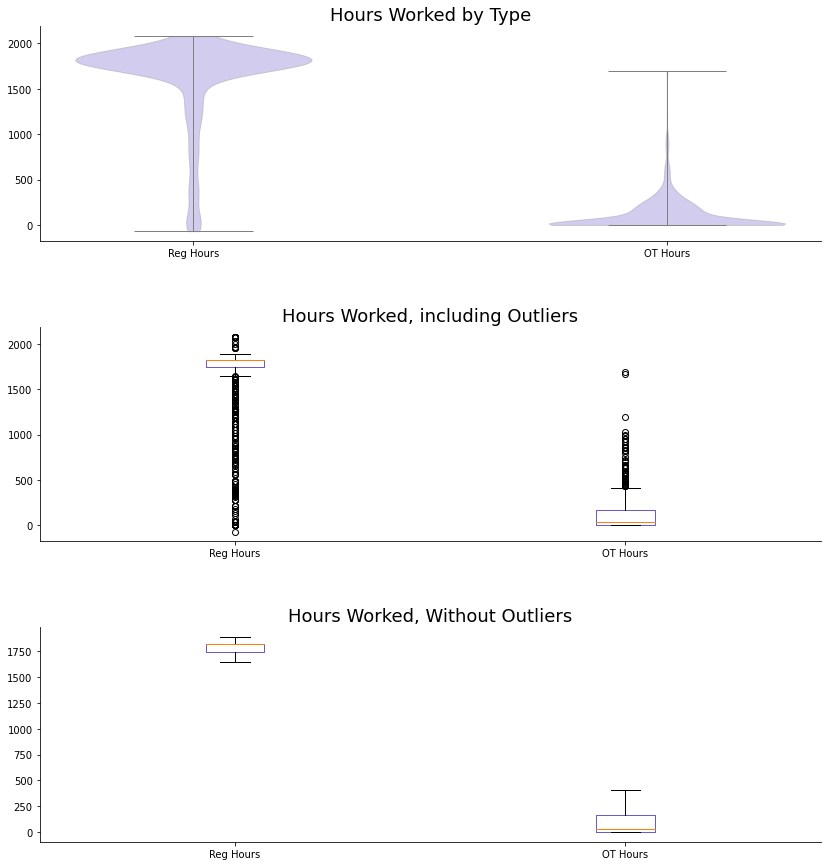

In [10]:
hwdf = nycp[['Reg Hours' , 'OT Hours']]

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(14,15))

# Violin
violin_parts = axs[0].violinplot(hwdf)
axs[0].set_title('Hours Worked by Type',fontsize=18)

for partname in ('cbars','cmins','cmaxes'):
    vp = violin_parts[partname]
    vp.set_edgecolor('gray')
    vp.set_linewidth(1)
    
for pc in violin_parts['bodies']:
    pc.set_facecolor('slateblue')
    pc.set_edgecolor('gray')

# Box
box_parts = axs[1].boxplot(hwdf)
axs[1].set_title('Hours Worked, including Outliers', fontsize=18)

for box in box_parts['boxes']:
    box.set(color='slateblue', linewidth=1)

# Box w/o outliers
box_parts = axs[2].boxplot(hwdf, showfliers = False)
axs[2].set_title('Hours Worked, Without Outliers', fontsize=18)

for box in box_parts['boxes']:
    box.set(color='slateblue', linewidth=1)
    
for ax in axs:
    ax.yaxis.grid(False)
    ax.spines[['right', 'top']].set_visible(False)
    
plt.setp(axs, xticks=[y + 1 for y in range(len(hwdf.columns))],
         xticklabels=hwdf.columns)
plt.subplots_adjust(hspace=.4)

plt.show()